# Predict if the customer is going to honor the reservation or cancel it ?

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/Users/rose/Downloads/Hotel Reservations.csv")

### 1. Clean data

- Clean date and combind date component

In [4]:
df.loc[(df['arrival_date']==29) & (df['arrival_year']==2018) & (df['arrival_month']==2), 'arrival_date']  = 28
df['arrival_date'] = pd.to_datetime(df['arrival_year'].astype(str)+"-"+df['arrival_month'].astype(str).str.zfill(2)+"-"+df['arrival_date'].astype(str))

In [57]:
df['arrival_wkday'] = df['arrival_date'].dt.dayofweek

### 2. Explore data

From this step, there is something weird after 2018-01. So, let's explore further!

<AxesSubplot:xlabel='arrival_date', ylabel='Count'>

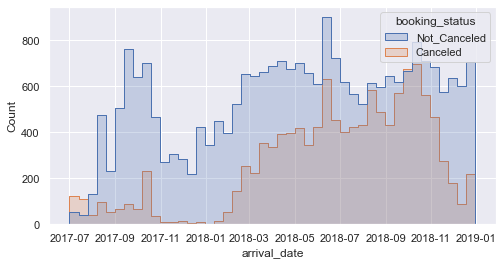

In [25]:
sns.set(rc={'figure.figsize':(8,4)})
sns.histplot(x = df['arrival_date'], hue = df['booking_status'], element="step")

<AxesSubplot:xlabel='arrival_wkday', ylabel='arrival_month'>

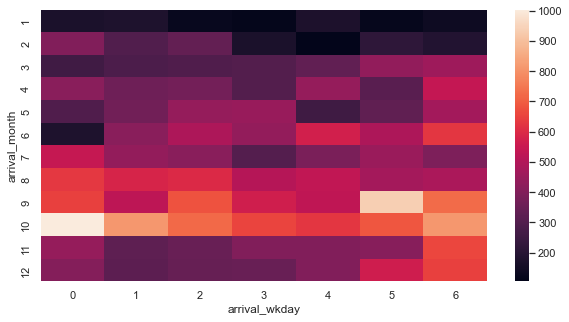

In [58]:
sns.heatmap(df.pivot_table(index = 'arrival_month', columns = 'arrival_wkday', values = 'arrival_date', aggfunc = 'count'))

This plot has pointed out maybe the online is the problem, so let's check it out by exclude online reservation!

<AxesSubplot:xlabel='arrival_date', ylabel='Count'>

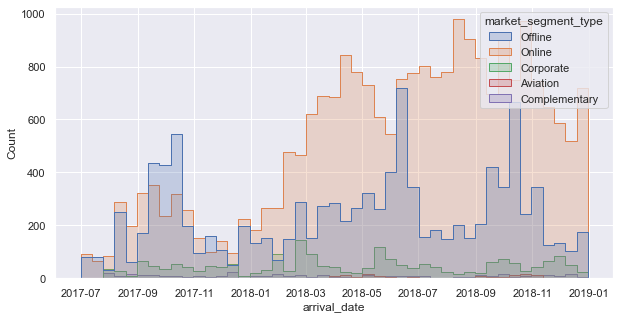

In [27]:
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(x = df['arrival_date'], hue = df['market_segment_type'], element="step")

After excluded, the graph still look the same. So, I managed to pivot the data to see the percent contribution of canceled ticket.
And as you can see, it's doesn't difference that much.

<AxesSubplot:xlabel='arrival_date', ylabel='Count'>

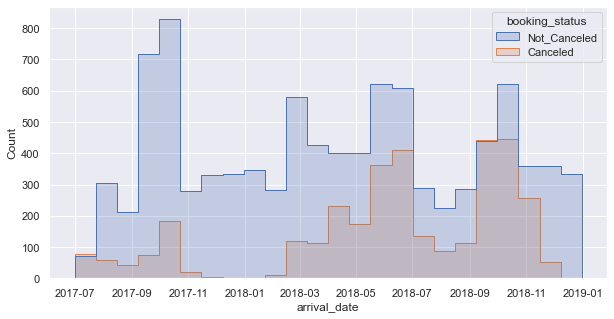

In [30]:
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(x = df.loc[df['market_segment_type'] != 'Online', 'arrival_date'], hue = df['booking_status'], element="step")

In [46]:
x = pd.pivot_table(data = df, index = 'market_segment_type', columns = 'booking_status', values = 'arrival_date', aggfunc = 'count')
x['percent_canceled'] = x['Canceled']*100/(x['Canceled']+x['Not_Canceled'])
x

booking_status,Canceled,Not_Canceled,percent_canceled
market_segment_type,,,
Aviation,37.0,88.0,29.600000
Complementary,NaN,391.0,NaN
Corporate,220.0,1797.0,10.907288
Offline,3153.0,7375.0,29.948708
Online,8475.0,14739.0,36.508142


<AxesSubplot:xlabel='avg_price_per_room', ylabel='Count'>

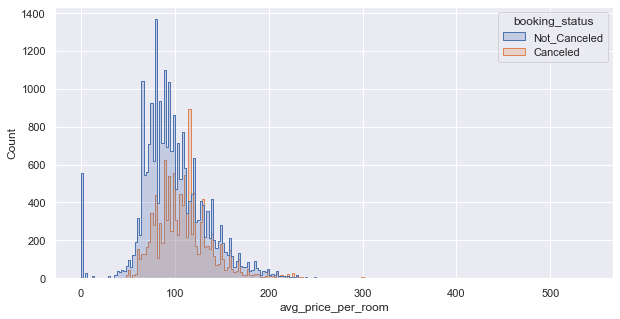

In [48]:
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(x = df['avg_price_per_room'], hue = df['booking_status'], element="step")

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

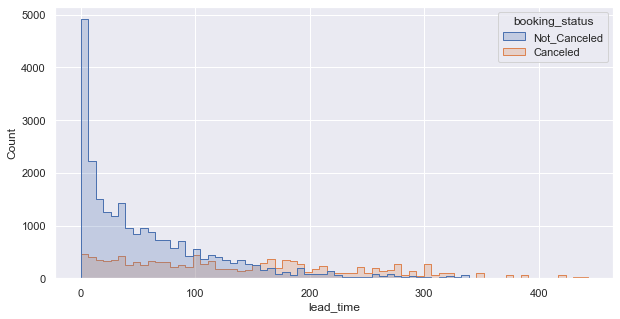

In [56]:
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(x = df['lead_time'], hue = df['booking_status'], element="step")

In [50]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2017-10-02,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,2018-11-06,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,2018-02-28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,2018-05-20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,2018-04-11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,2018-08-03,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,2018-10-17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,2018-07-01,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,2018-04-21,Online,0,0,0,94.50,0,Canceled
